In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [14]:
df_sal = pd.read_csv("C:\\Users\\Hira Coder\\Downloads\\Position_Salaries.csv")
df_sal

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
# Describe data
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


C:\Users\Hira Coder\AppData\Local\Temp\ipykernel_864\3676038920.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


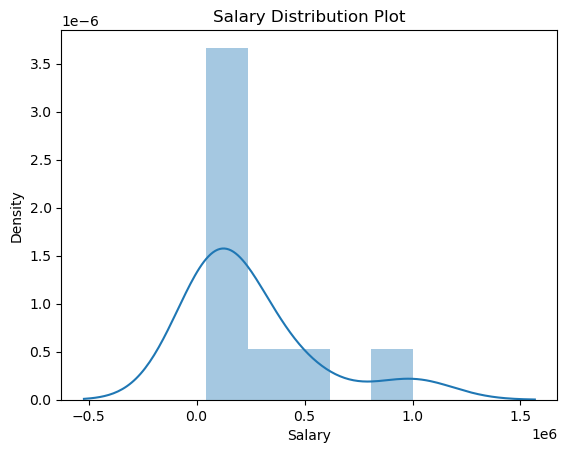

In [16]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

#Data Normal hai ya Skewed?Salary کی concentration کہاں ہے?Outliers موجود ہیں یا نہیں?
#یہ plot دراصل ایک Histogram + KDE (Kernel Density Estimate) دونوں کو combine کرتا ہے۔
#اور اس کا مقصد سمجھنا ہوتا ہے کہ "salary" کا ڈیٹا کس طرح پھیلا ہوا ہے (distributed ہے)۔

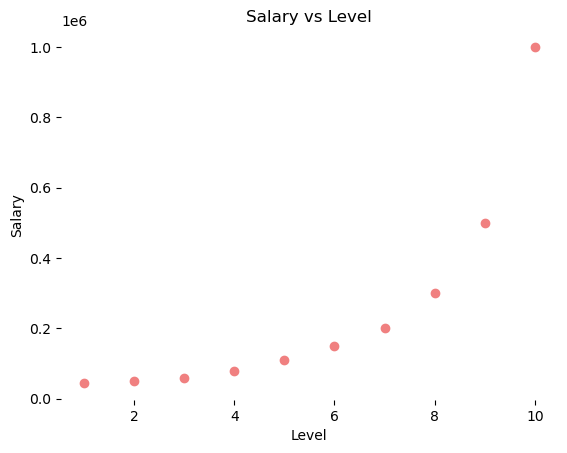

In [17]:
# Relationship between Salary and Level
plt.scatter(df_sal['Level'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [18]:
# Splitting variables
X = df_sal.iloc[:, 1:-1].values  # independent
y = df_sal.iloc[:, -1].values  # dependent


In [19]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [20]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [22]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [24]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4) # yh aik object ha class ka jis ki properties hm yhn use kr rhy ha or degree iska aik custructor type ha 
X_poly = pr.fit_transform(X)  # yh mean media ya std ly kr to usy 0,1 ki range m scale kr ra ha 
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

In [25]:
# Predict results
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_lr

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [26]:
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression
y_pred_poly

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

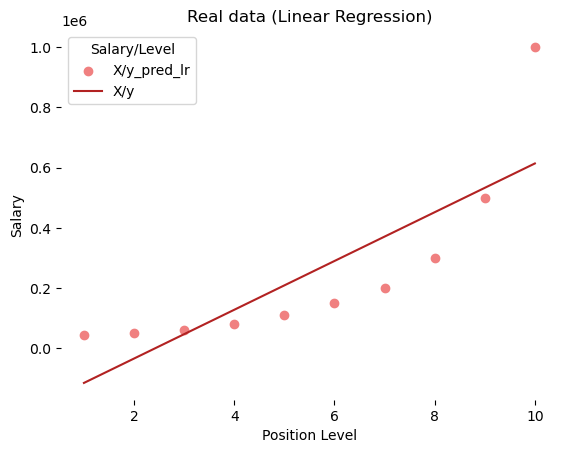

In [27]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

C:\Users\Hira Coder\AppData\Local\Temp\ipykernel_864\1931787223.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


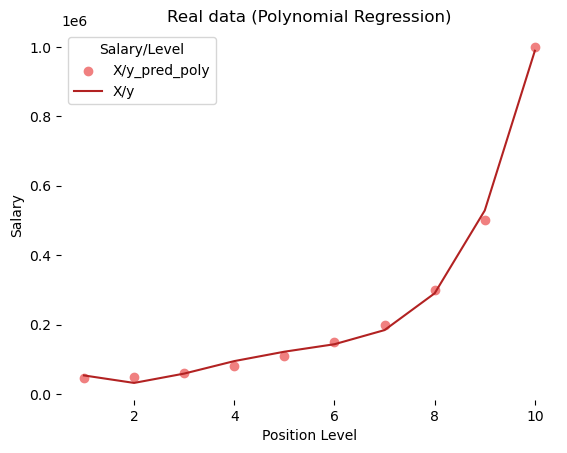

In [28]:
# Visualize real data with polynomial regression
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [29]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[7.5]])}')

# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[7.5]]))}')


Linear Regression result : [411257.57575758]
Polynomial Regression result : [225126.29297782]


In [ ]:
#Model ko input value 7.5 di gayi hai (e.g., 7.5 hours, 7.5 years, etc.)
#Model batata hai is input ke liye target (e.g., marks, salary, sales) kitna hoga

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

In [32]:
# Load dataset 
boston = fetch_openml(name="boston", as_frame=True) 
df = boston.frame 
df

F:\Anacond\Lib\site-packages\sklearn\datasets\_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [34]:
df.shape

(506, 14)

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
X = df.drop(columns=["MEDV"]) 
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [38]:
y = df["MEDV"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split( 
X, y, test_size=0.2, random_state=42 
) 
print("Train set:", X_train.shape) 
print("Test set:", X_test.shape)

Train set: (404, 13)
Test set: (102, 13)


In [41]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_train_scaled

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [42]:
X_test_scaled = scaler.transform(X_test) 
X_test_scaled

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [43]:
degree = 2 
poly = PolynomialFeatures(degree=degree, include_bias=False) 
X_train_poly = poly.fit_transform(X_train_scaled) 
X_test_poly = poly.transform(X_test_scaled) 
print("Original features:", X_train.shape[1]) 
print("Polynomial features:", X_train_poly.shape[1]) 

Original features: 13
Polynomial features: 104


In [44]:
model = LinearRegression() 
model.fit(X_train_poly, y_train)

LinearRegression()

In [46]:
y_train_pred = model.predict(X_train_poly) 
y_train_pred

array([12.5928166 , 19.33276181, 18.74601546,  9.3852386 , 18.41307718,
       25.79721457, 21.32110945, 25.01485337,  7.11809501, 19.0518797 ,
       22.99234153, 29.45292814, 32.03710219, 15.34818405, 40.99918665,
       13.84508313, 21.28875011, 25.41007413, 17.38464418, 24.31378377,
        9.09956674, 19.93613902, 23.61207728, 22.20348992, 23.65490226,
       35.67363776, 15.16496715, 45.09845534, 15.57253545, 23.47845247,
       16.66771115, 14.85761403, 15.31506489, 21.07353526, 21.28235533,
       29.74925927, 28.79549568, 15.72255002, 17.48582528, 25.20122751,
       18.00963593, 16.49053427,  9.2419006 , 22.22168982, 14.18921281,
       11.21268058, 14.76919401, 47.93009691, 16.33749877, 13.98910624,
       26.27395046, 21.15893512, 19.68089785, 20.90469307, 15.72832867,
       25.11580933, 31.6476115 ,  1.48549949, 27.08140421, 17.05099768,
       24.42316015, 24.42020399, 22.7008045 , 20.07903561, 47.87582529,
       16.93584209, 15.68001034, 19.16741407, 22.0366415 , 20.63

In [47]:
y_test_pred = model.predict(X_test_poly)
y_test_pred 

array([27.02066528, 34.88176729, 14.39814371, 21.03259479, 16.3394099 ,
       16.73278006, 16.75632251, 14.67338977, 22.42895134, 19.07830489,
       18.04006554, 21.96927429, 13.30402899, 17.92820483, 18.6820629 ,
       25.02340339, 18.86289541,  9.75709846, 48.87111855, 13.83010978,
       24.70057518, 27.57562933, 15.08936865, 20.27468283, 17.92775962,
       18.47905023, 18.05211001, 13.7320497 , 16.78378615, 18.9349686 ,
       20.77006997, 24.79480928, 19.88674065, 26.88064834, 14.39485686,
       17.67440515, 31.81220329, 20.13670679, 21.20333528, 22.70668744,
       16.83328242, 31.95831739, 51.28135483, 15.56176188, 26.05834936,
       17.69722386, 15.08922724, 24.86990164, 18.86407708, 26.33300978,
       22.38070848, 35.64205091, 17.2905929 , 26.55379322, 45.02494565,
       23.74310341, 15.74804361, 32.91957225, 25.8023213 , 15.98814947,
       23.35157387, 28.62233698, 29.73727161, 13.59215626, 26.09482595,
       15.12915817, 15.79980895, 25.05613321, 29.76324466, 12.99

In [48]:
print(f"Polynomial Regression (Degree {degree})") 
print("\n--- Training Performance ---") 
print(f"MSE (Train): {mean_squared_error(y_train, y_train_pred):.2f}") 
print(f"R² (Train): {r2_score(y_train, y_train_pred):.3f}") 
print("\n--- Testing Performance ---") 
print(f"MSE (Test): {mean_squared_error(y_test, y_test_pred):.2f}") 
print(f"R² (Test): {r2_score(y_test, y_test_pred):.3f}") 

Polynomial Regression (Degree 2)

--- Training Performance ---
MSE (Train): 5.13
R² (Train): 0.941

--- Testing Performance ---
MSE (Test): 14.26
R² (Test): 0.806


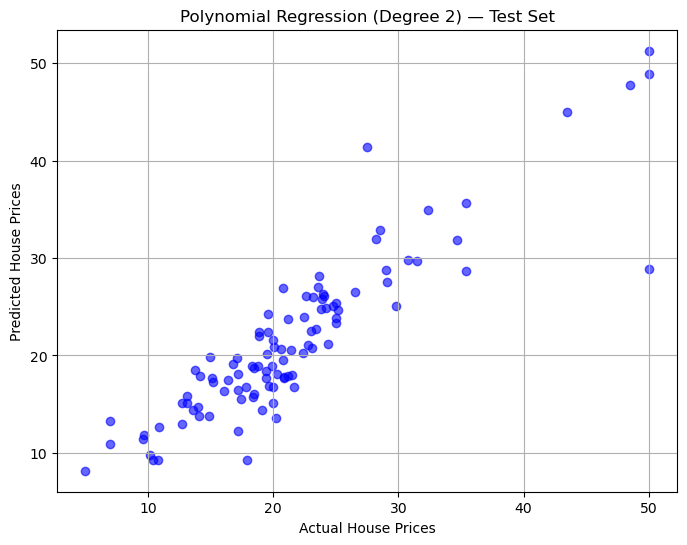

In [50]:
plt.figure(figsize=(8,6)) 
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6) 
plt.xlabel("Actual House Prices") 
plt.ylabel("Predicted House Prices") 
plt.title(f"Polynomial Regression (Degree {degree}) — Test Set") 
plt.grid(True) 
plt.show()

In [ ]:
#Agar R² 1 ke kareeb ho to perfect fit hota hai, agar negative aaye to model galat predict kar raha hai.
#Regression me accuracy ke liye hum R² score (Coefficient of Determination) use karte hain

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
data = {
    'Horsepower': [60,70,80,90,100,110,120,130,140,150,
                   160,170,180,190,200,210,220,230,240,250],
    'Price': [7000,8000,8500,9000,9500,11000,13000,16000,19000,22000,
              25000,29000,34000,40000,47000,55000,64000,75000,87000,100000]
}

df = pd.DataFrame(data)
df

,Horsepower,Price
0,60,7000
1,70,8000
2,80,8500
3,90,9000
4,100,9500
5,110,11000
6,120,13000
7,130,16000
8,140,19000
9,150,22000


In [55]:
X = df[['Horsepower']]
X

,Horsepower
0,60
1,70
2,80
3,90
4,100
5,110
6,120
7,130
8,140
9,150


In [56]:
y = df['Price']
y

0       7000
1       8000
2       8500
3       9000
4       9500
5      11000
6      13000
7      16000
8      19000
9      22000
10     25000
11     29000
12     34000
13     40000
14     47000
15     55000
16     64000
17     75000
18     87000
19    100000
Name: Price, dtype: int64

In [59]:
poly = PolynomialFeatures(degree=3)
poly

PolynomialFeatures(degree=3)

In [60]:
X_poly = poly.fit_transform(X)
X_poly

array([[1.0000e+00, 6.0000e+01, 3.6000e+03, 2.1600e+05],
       [1.0000e+00, 7.0000e+01, 4.9000e+03, 3.4300e+05],
       [1.0000e+00, 8.0000e+01, 6.4000e+03, 5.1200e+05],
       [1.0000e+00, 9.0000e+01, 8.1000e+03, 7.2900e+05],
       [1.0000e+00, 1.0000e+02, 1.0000e+04, 1.0000e+06],
       [1.0000e+00, 1.1000e+02, 1.2100e+04, 1.3310e+06],
       [1.0000e+00, 1.2000e+02, 1.4400e+04, 1.7280e+06],
       [1.0000e+00, 1.3000e+02, 1.6900e+04, 2.1970e+06],
       [1.0000e+00, 1.4000e+02, 1.9600e+04, 2.7440e+06],
       [1.0000e+00, 1.5000e+02, 2.2500e+04, 3.3750e+06],
       [1.0000e+00, 1.6000e+02, 2.5600e+04, 4.0960e+06],
       [1.0000e+00, 1.7000e+02, 2.8900e+04, 4.9130e+06],
       [1.0000e+00, 1.8000e+02, 3.2400e+04, 5.8320e+06],
       [1.0000e+00, 1.9000e+02, 3.6100e+04, 6.8590e+06],
       [1.0000e+00, 2.0000e+02, 4.0000e+04, 8.0000e+06],
       [1.0000e+00, 2.1000e+02, 4.4100e+04, 9.2610e+06],
       [1.0000e+00, 2.2000e+02, 4.8400e+04, 1.0648e+07],
       [1.0000e+00, 2.3000e+02,

In [61]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [63]:
y_pred = model.predict(X_poly)
y_pred

array([ 6688.14229238,  7585.92528741,  8465.22333489,  9407.7147063 ,
       10495.07767313, 11808.99050684, 13431.1314789 , 15443.1788608 ,
       17926.810924  , 20963.70593999, 24635.54218023, 29023.9979162 ,
       34210.75141938, 40277.48096124, 47305.86481325, 55377.58124689,
       64574.30853364, 74977.72494496, 86669.50875234, 99731.33822724])

In [65]:
mse = mean_squared_error(y, y_pred)
mse

290251.5763950675

In [66]:
r2 = r2_score(y, y_pred)
r2

0.9996240617605275

In [67]:
print("✅ Model Evaluation Results:")
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 3))
print("Model Accuracy: {:.2f}%".format(r2 * 100))

✅ Model Evaluation Results:
Mean Squared Error: 290251.58
R² Score: 1.0
Model Accuracy: 99.96%


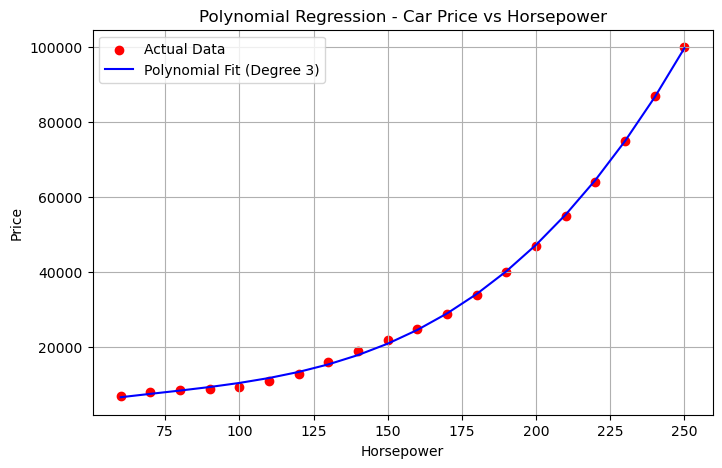

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred, color='blue', label='Polynomial Fit (Degree 3)')
plt.title("Polynomial Regression - Car Price vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

🔹 Linear Regression Results
MSE: 26367296.97
R²: 0.817
Accuracy: 81.73%

🔹 Polynomial Regression Results (Degree 3)
MSE: 84282.28
R²: 0.999
Accuracy: 99.94%


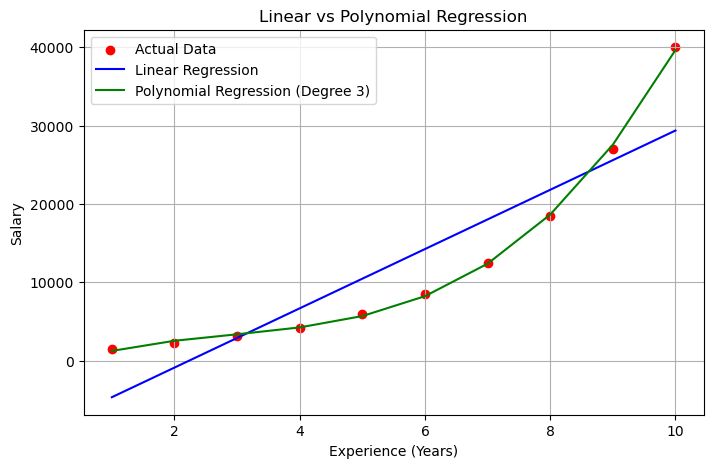

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a non-linear dataset
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [1500, 2300, 3100, 4200, 6000, 8500, 12500, 18500, 27000, 40000]
}

df = pd.DataFrame(data)
X = df[['Experience']]
y = df['Salary']

# Step 2: Linear Regression (for comparison)
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

# Step 3: Polynomial Regression (degree = 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Step 4: Evaluation
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print("🔹 Linear Regression Results")
print(f"MSE: {mse_lin:.2f}")
print(f"R²: {r2_lin:.3f}")
print(f"Accuracy: {r2_lin*100:.2f}%")

print("\n🔹 Polynomial Regression Results (Degree 3)")
print(f"MSE: {mse_poly:.2f}")
print(f"R²: {r2_poly:.3f}")
print(f"Accuracy: {r2_poly*100:.2f}%")

# Step 5: Visualization
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred_lin, color='blue', label='Linear Regression')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression (Degree 3)')
plt.title("Linear vs Polynomial Regression")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


In [70]:
df = pd.read_csv("E:\\Datasets\\seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Linear Regression Results:
R² (Test): 0.805
MSE (Test): 11.10

Polynomial Regression (Degree 2) Results:
R² (Test): 0.832
MSE (Test): 9.54


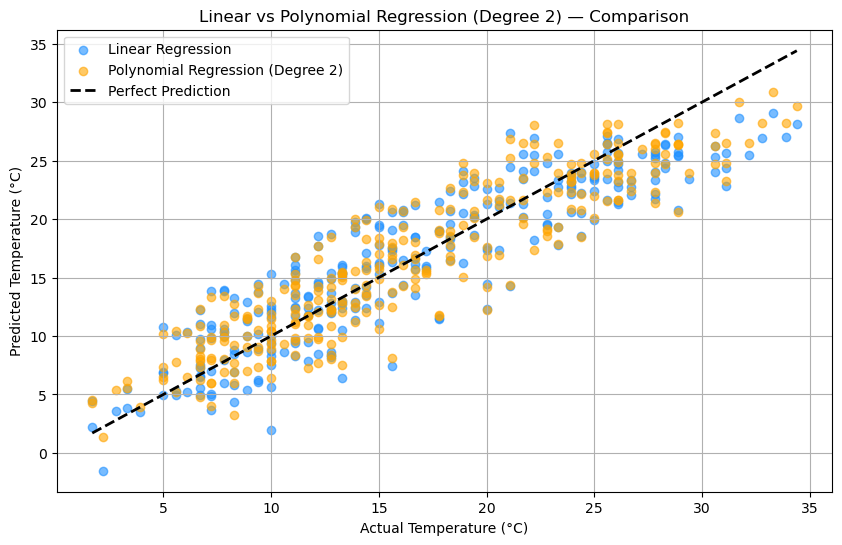

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
df = pd.read_csv("E:\\Datasets\\seattle-weather.csv")

# Step 2: Select numeric columns
X = df[['precipitation', 'temp_min', 'wind']]
y = df['temp_max']

# Step 3: Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- LINEAR REGRESSION ----------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_linear = lr.predict(X_test_scaled)

# ---------------- POLYNOMIAL REGRESSION (Degree 2) ----------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# ---------------- EVALUATION ----------------
print("Linear Regression Results:")
print(f"R² (Test): {r2_score(y_test, y_pred_linear):.3f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_linear):.2f}\n")

print("Polynomial Regression (Degree 2) Results:")
print(f"R² (Test): {r2_score(y_test, y_pred_poly):.3f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_poly):.2f}")

# ---------------- VISUALIZATION ----------------
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linear, color='dodgerblue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6, label='Polynomial Regression (Degree 2)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Linear vs Polynomial Regression (Degree 2) — Comparison")
plt.legend()
plt.grid(True)
plt.show()


✅ Univariate Linear Regression Results:
Slope (Coefficient): 1.2813218776593822
Intercept: 5.887690958165621
Mean Squared Error: 12.59
R² Score: 0.767
Model Accuracy: 76.68%


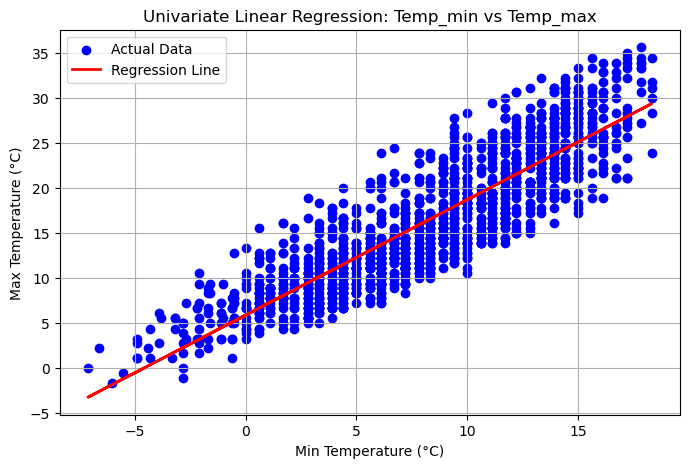

In [83]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
df = pd.read_csv("E:\\Datasets\\seattle-weather.csv")

# Step 3: Select one independent variable (Univariate)
X = df[['temp_min']]    # Independent variable (2D)
y = df['temp_max']      # Dependent variable

# Step 4: Drop missing values (if any)
df = df.dropna()

# Step 5: Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 6: Predict
y_pred = model.predict(X)

# Step 7: Evaluate model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("✅ Univariate Linear Regression Results:")
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 3))
print("Model Accuracy: {:.2f}%".format(r2 * 100))

# Step 8: Visualization
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Min Temperature (°C)")
plt.ylabel("Max Temperature (°C)")
plt.title("Univariate Linear Regression: Temp_min vs Temp_max")
plt.legend()
plt.grid(True)
plt.show()


✅ Polynomial Regression (Degree 2) Results:
Coefficients: [0.85665367 0.02790524]
Intercept: 6.788858434625144
Mean Squared Error: 11.93
R² Score: 0.779
Model Accuracy: 77.91%


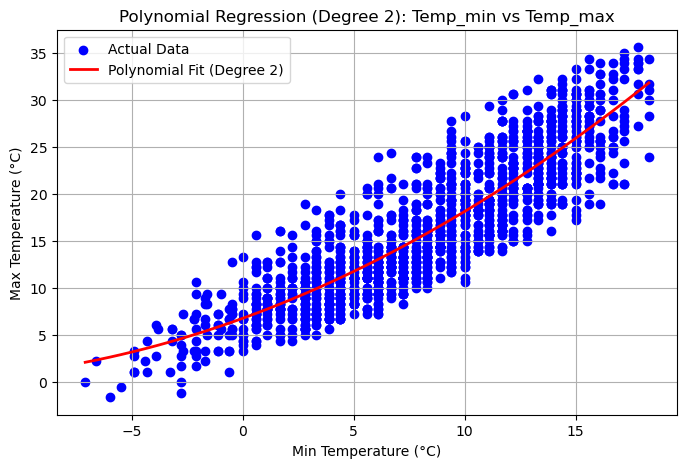

In [88]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
df = pd.read_csv("E:\\Datasets\\seattle-weather.csv")

# Step 3: Select univariate feature
X = df[['temp_min']]   # Independent variable
y = df['temp_max']     # Target variable

# Step 4: Drop missing values
df = df.dropna()

# Step 5: Polynomial Feature Transformation (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 6: Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Step 7: Predict
y_pred = model.predict(X_poly)

# Step 8: Evaluate model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("✅ Polynomial Regression (Degree 2) Results:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 3))
print("Model Accuracy: {:.2f}%".format(r2 * 100))

# Step 9: Visualization
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')

# Sort values for smooth curve
sorted_zip = sorted(zip(X['temp_min'], y_pred))
X_sorted, y_sorted = zip(*sorted_zip)

plt.plot(X_sorted, y_sorted, color='red', linewidth=2, label='Polynomial Fit (Degree 2)')
plt.xlabel("Min Temperature (°C)")
plt.ylabel("Max Temperature (°C)")
plt.title("Polynomial Regression (Degree 2): Temp_min vs Temp_max")
plt.legend()
plt.grid(True)
plt.show()


In [85]:
df.shape

(1461, 6)

In [ ]:
do columns k darmiyan linearity correaltion sy dekhty hai aik bhar raha ha to dosra km hora hota hai 1 k passs hai to linear ha dependnt hoty ha linear straight line 
or non linear onversly dependant hoty hain correlation ki value -1 k pass hogi 
0 k pass koi relation ni ha
    